<a href="https://colab.research.google.com/github/Salma-Abouzeid/NLP-Task/blob/main/Copy_of_NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [1]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

# EDA and Visualisation

The sample dataset was used instead of the whole dataset (train + test) because of size and computation limitations

In [2]:
import pandas as pd

In [3]:
df.shape

(20000, 6)

In [4]:
df.head(10)

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
5,negative,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,Going to miss Pastor's sermon on Faith...
6,positive,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch....dj should come eat with me
7,negative,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,@piginthepoke oh why are you feeling like that?
8,negative,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo!peyton needs to live!this is horrible
9,positive,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,@mrstessyman thank you glad you like it! There...


In [5]:
print('duplicates:',df.duplicated().sum())
nulls=df.isnull().sum()
print('nulls')
print(nulls)

duplicates: 0
nulls
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

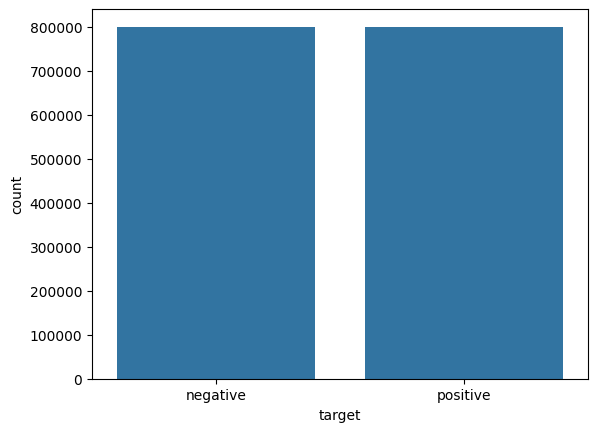

In [7]:
sns.countplot(x='target',data=train_df) #training dataset is balanced but has no neutral class

<Axes: xlabel='target', ylabel='count'>

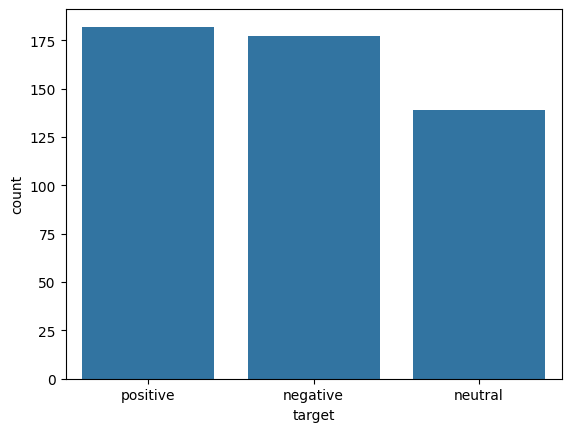

In [8]:
sns.countplot(x='target',data=test_df) #testing dataset is almost balanced with a new neutral class

<Axes: xlabel='target', ylabel='count'>

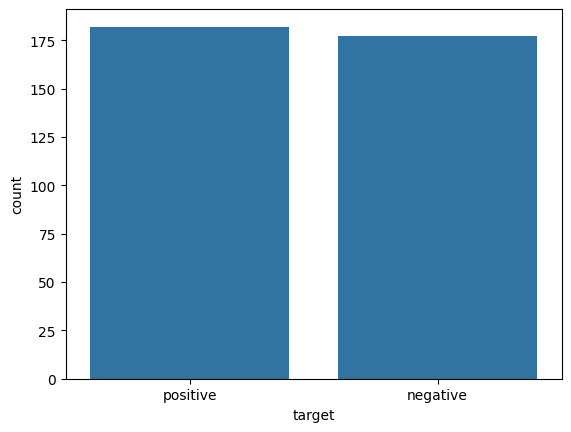

In [9]:
#removing the neutral class from the test data to avoid missclassification and false error during testing
test_df=test_df[test_df['target']!='neutral']
sns.countplot(x='target',data=test_df)

<Axes: xlabel='target', ylabel='count'>

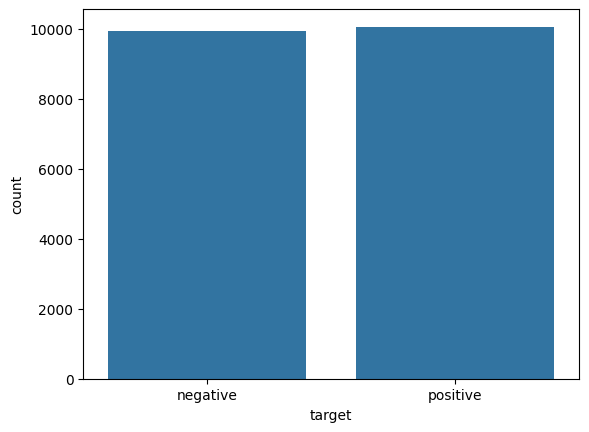

In [10]:
sns.countplot(x='target',data=df)

In [11]:
df['target']=df['target'].map({'positive':1,'negative':0})

In [12]:
#tweet length
length=[]
for i in df['text']:
  length.append(len(i))
df['length']=length

<Axes: xlabel='length', ylabel='Count'>

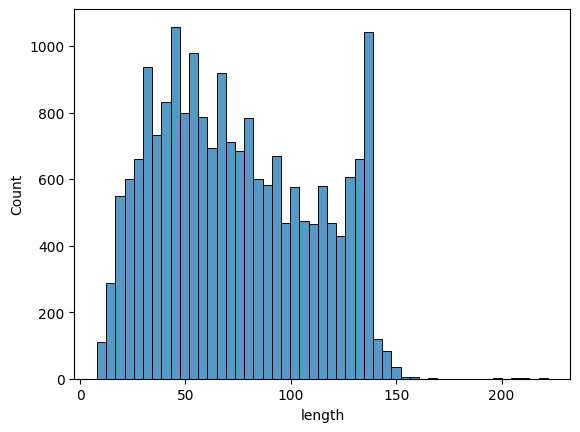

In [13]:
sns.histplot(df['length'])

In [14]:
df['text'].head(5) #5 sample tweets

,text
0,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,"@misstoriblack cool , i have no tweet apps fo..."
2,@TiannaChaos i know just family drama. its la...
3,School email won't open and I have geography ...
4,upper airways problem


# REGEX

Removing URLs, mentions (@user), hashtags, emojis, and extra whitespace.

In [15]:
import re

In [16]:
#urls
pattern1=r'https?://\S+|www\.\S+'
re.findall(pattern1,str(df['text'][0]))

[]

http – Matches the literal string "http"

s? – The ? makes the preceding character (s) optional
→ Matches both "http" and "https"

:// – Matches the literal characters "://"
\S – Matches any non-whitespace character

the + – Means "one or more" of the preceding token

In [17]:
#mentions and hashtags
pattern2=r'(?<!\S)@\w+'
re.findall(pattern2,str(df['text'][2]))

['@TiannaChaos']

In [18]:
#emojis
pattern3=r'[\U0001F600-\U0001F64F' \
                r'\U0001F300-\U0001F5FF' \
                r'\U0001F680-\U0001F6FF' \
                r'\U0001F1E0-\U0001F1FF' \
                r'\U00002700-\U000027BF' \
                r'\U0001F900-\U0001F9FF' \
                r'\U0001FA70-\U0001FAFF' \
                r'\U00002600-\U000026FF' \
                r'\U000025A0-\U000025FF]'

In [19]:
#numbers
pattern4=r'\d+'

In [20]:
combined_pattern = f"{pattern1}|{pattern2}|{pattern3}|{pattern4}"
# Clean the text
df['clean_text'] = df['text'].apply(lambda x: re.sub(combined_pattern,'', str(x),flags=re.I).strip())

In [21]:
#replacing punctuations and hashtags
pattern5=r'[^\w\s]|\#'
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(pattern5,' ', str(x),flags=re.I).strip())

In [22]:
pattern6=r'[^A-Za-z0-9\s]+'
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(pattern6,'', str(x),flags=re.I).strip())

In [23]:
comparison = df[['text', 'clean_text']].copy()
comparison['changed'] = df['text'] != df['clean_text']
comparison.head(10)

,text,clean_text,changed
0,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK,True
1,"@misstoriblack cool , i have no tweet apps fo...",cool i have no tweet apps for my razr,True
2,@TiannaChaos i know just family drama. its la...,i know just family drama its lame hey next t...,True
3,School email won't open and I have geography ...,School email won t open and I have geography ...,True
4,upper airways problem,upper airways problem,True
5,Going to miss Pastor's sermon on Faith...,Going to miss Pastor s sermon on Faith,True
6,on lunch....dj should come eat with me,on lunch dj should come eat with me,True
7,@piginthepoke oh why are you feeling like that?,oh why are you feeling like that,True
8,gahh noo!peyton needs to live!this is horrible,gahh noo peyton needs to live this is horrible,True
9,@mrstessyman thank you glad you like it! There...,thank you glad you like it There is a product...,True


In [24]:
df.head()

,target,id,date,flag,user,text,length,clean_text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,AHHH I HOPE YOUR OK
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,cool i have no tweet apps for my razr
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,i know just family drama its lame hey next t...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,School email won t open and I have geography ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,upper airways problem


# Case Folding

In [25]:
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())

In [26]:
df['clean_text'].head(5)

,clean_text
0,ahhh i hope your ok
1,cool i have no tweet apps for my razr
2,i know just family drama its lame hey next t...
3,school email won t open and i have geography ...
4,upper airways problem


# Tokenisation

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
from nltk.tokenize import word_tokenize
df['word_tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x))

In [29]:
df['word_tokens'].head(6)

,word_tokens
0,"[ahhh, i, hope, your, ok]"
1,"[cool, i, have, no, tweet, apps, for, my, razr]"
2,"[i, know, just, family, drama, its, lame, hey,..."
3,"[school, email, won, t, open, and, i, have, ge..."
4,"[upper, airways, problem]"
5,"[going, to, miss, pastor, s, sermon, on, faith]"


In [30]:
#most frequent tokens
from collections import Counter
c=Counter([word for tokens in df['word_tokens'] for word in tokens]) #nested list comprehension
print(c.most_common(10))

[('i', 11828), ('to', 7090), ('the', 6569), ('a', 4894), ('my', 3920), ('you', 3885), ('it', 3789), ('and', 3770), ('is', 2923), ('for', 2735)]


Outer loop: for tokens in df['word_tokens']

Iterates through each list in the column

Inner loop: for word in tokens

Iterates through each word in the current list of tokens

Each word from all lists is collected into one flat list

# stop words removal

In [31]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['word_tokens'] = df['word_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['word_tokens'].head(5)

,word_tokens
0,"[ahhh, hope, ok]"
1,"[cool, tweet, apps, razr]"
2,"[know, family, drama, lame, hey, next, time, u..."
3,"[school, email, open, geography, stuff, revise..."
4,"[upper, airways, problem]"


# Stemming and Lemmatisation

In [33]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
df['stemmed_words'] = df['word_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [34]:
df['stemmed_words'].head(5)

,stemmed_words
0,"[ahhh, hope, ok]"
1,"[cool, tweet, app, razr]"
2,"[know, famili, drama, lame, hey, next, time, u..."
3,"[school, email, open, geographi, stuff, revis,..."
4,"[upper, airway, problem]"


In [35]:
#SpaCy
import spacy
nlp_model=spacy.load('en_core_web_sm')

In [36]:
from pydoc import doc
texts = df['word_tokens'].apply(lambda x: ' '.join(x)).astype(str)
docs = list(nlp_model.pipe(texts, batch_size=32))
df['lemmatized_words'] = [[token.lemma_ for token in doc] for doc in docs]

' '.join(x) joins that list into a single string for SpaCy.

.astype(str) ensures that if any value is None or NaN, it's turned into a safe string (so nlp_model.pipe() won't crash).

nlp_model.pipe(...) is a batch-processing method in SpaCy — much faster than calling nlp_model(...) in a loop.
It processes all the rows efficiently using multiple threads.
batch_size=32 controls how many rows are processed at a time.
list(...) collects the output into a list of Doc objects — one per row.

For each Doc object (from each row), it extracts the lemmatized form of each token (token.lemma_)
Returns a list of lemmas per row

In [37]:
df['lemmatized_words'].head(5)

,lemmatized_words
0,"[ahhh, hope, ok]"
1,"[cool, tweet, app, razr]"
2,"[know, family, drama, lame, hey, next, time, u..."
3,"[school, email, open, geography, stuff, revise..."
4,"[upper, airway, problem]"


In [38]:
comparison = df[['word_tokens', 'stemmed_words','lemmatized_words']].copy()
comparison.head(10)

,word_tokens,stemmed_words,lemmatized_words
0,"[ahhh, hope, ok]","[ahhh, hope, ok]","[ahhh, hope, ok]"
1,"[cool, tweet, apps, razr]","[cool, tweet, app, razr]","[cool, tweet, app, razr]"
2,"[know, family, drama, lame, hey, next, time, u...","[know, famili, drama, lame, hey, next, time, u...","[know, family, drama, lame, hey, next, time, u..."
3,"[school, email, open, geography, stuff, revise...","[school, email, open, geographi, stuff, revis,...","[school, email, open, geography, stuff, revise..."
4,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]"
5,"[going, miss, pastor, sermon, faith]","[go, miss, pastor, sermon, faith]","[go, miss, pastor, sermon, faith]"
6,"[lunch, dj, come, eat]","[lunch, dj, come, eat]","[lunch, dj, come, eat]"
7,"[oh, feeling, like]","[oh, feel, like]","[oh, feel, like]"
8,"[gahh, noo, peyton, needs, live, horrible]","[gahh, noo, peyton, need, live, horribl]","[gahh, noo, peyton, need, live, horrible]"
9,"[thank, glad, like, product, review, bit, site...","[thank, glad, like, product, review, bit, site...","[thank, glad, like, product, review, bit, site..."


# Parts Of Speech

In [39]:
#df['pos_tags'] = [[token.pos_ for token in doc] for doc in docs]

In [40]:
# store the POS counts for each document
document_pos_counts = []

# Iterate through each Doc object in the list (docs)
for doc in docs:
    # Create a Counter for the current document
    pos_counts_in_doc = Counter()

    # Update the counter with the POS tags of the tokens in the current doc, This is the "per row" calculation
    pos_counts_in_doc.update([token.pos_ for token in doc])

    # Store the result for the current document
    document_pos_counts.append(pos_counts_in_doc)

count_df=pd.DataFrame(document_pos_counts).fillna(0)
count_df.head()

,PROPN,NOUN,INTJ,ADJ,VERB,PRON,ADP,DET,AUX,NUM,ADV,PART,SCONJ,X,PUNCT,CCONJ,SYM
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,7.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
full_df=pd.concat([df,count_df],axis=1)

In [42]:
full_df.head()

,target,id,date,flag,user,text,length,clean_text,word_tokens,stemmed_words,...,DET,AUX,NUM,ADV,PART,SCONJ,X,PUNCT,CCONJ,SYM
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,ahhh i hope your ok,"[ahhh, hope, ok]","[ahhh, hope, ok]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,cool i have no tweet apps for my razr,"[cool, tweet, apps, razr]","[cool, tweet, app, razr]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,i know just family drama its lame hey next t...,"[know, family, drama, lame, hey, next, time, u...","[know, famili, drama, lame, hey, next, time, u...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,school email won t open and i have geography ...,"[school, email, open, geography, stuff, revise...","[school, email, open, geographi, stuff, revis,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Text Representation

In [43]:
#for the lemma string representation
df['lemma_str']=[' '.join(x) for x in df['lemmatized_words']]
full_df['lemma_str']=[' '.join(x) for x in full_df['lemmatized_words']]

In [44]:
df['lemma_str'].head()

,lemma_str
0,ahhh hope ok
1,cool tweet app razr
2,know family drama lame hey next time u hang ki...
3,school email open geography stuff revise stupi...
4,upper airway problem


In [45]:
#Data split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(full_df[['lemma_str','length','PROPN','NOUN','INTJ','ADJ','VERB']], full_df['target'], test_size=0.2, random_state=42)


In [46]:
x_train.head()

,lemma_str,length,PROPN,NOUN,INTJ,ADJ,VERB
5894,uncle eduard amp antie shirley come drop prese...,142,10.0,2.0,0.0,0.0,3.0
3728,nz love bit chilly bottle duty free keep we wa...,137,0.0,5.0,0.0,4.0,6.0
8958,sound like,25,0.0,0.0,0.0,0.0,1.0
7671,raman noodle bee knee,32,0.0,3.0,0.0,0.0,1.0
5999,true,43,0.0,0.0,0.0,1.0,0.0


In [47]:
#bow (text only, without pos)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=2)

x_train_bow = vectorizer.fit_transform(x_train['lemma_str'])
x_test_bow = vectorizer.transform(x_test['lemma_str'])

x_train_bow_dense=x_train_bow.toarray()
features=vectorizer.get_feature_names_out()
x_train_bow_df=pd.DataFrame(x_train_bow_dense,columns=features)

x_train_bow_df.head() #alphabetically ordered

,aa,aaah,aaahhhh,aahh,aaron,aaw,ab,abandon,abby,abc,...,zack,zap,zealand,zero,zombie,zomg,zone,zoo,zune,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#bow (text+ numerical with pos)

x_train_bow_pos=x_train[['length','PROPN','NOUN','INTJ','ADJ','VERB']]
x_test_bow_pos=x_test[['length','PROPN','NOUN','INTJ','ADJ','VERB']]

from scipy.sparse import hstack
# Combine text + numeric features
x_train_bow_full = hstack([x_train_bow,x_train_bow_pos])
x_test_bow_full = hstack([x_test_bow,x_test_bow_pos])

x_train_bow_full_dense=x_train_bow_full.toarray()
x_train_bow_full_df=pd.DataFrame(x_train_bow_full_dense)
x_train_bow_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5915,5916,5917,5918,5919,5920,5921,5922,5923,5924
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,142.0,10.0,2.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,137.0,0.0,5.0,0.0,4.0,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,0.0,3.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,1.0,0.0


In [49]:
#tf-idf (without pos)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['lemma_str'])
x_test_tfidf = tfidf_vectorizer.transform(x_test['lemma_str'])

x_train_tfidf_dense=x_train_tfidf.toarray()
features=tfidf_vectorizer.get_feature_names_out()
tfidf_df=pd.DataFrame(x_train_tfidf_dense,columns=features)

tfidf_df.head()

,aa,aaaaaaaaaaaw,aaaaaaaaah,aaaaaargh,aaaaahhhhhh,aaaaargh,aaaah,aaaamazing,aaaargh,aaaarrrggghhh,...,zoo,zooming,zune,zz,zzz,zzzz,zzzzz,zzzzzz,zzzzzzzzz,zzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#tf-idf (text + numeric with pos)

x_train_tfidf_pos=x_train[['length','PROPN','NOUN','INTJ','ADJ','VERB']]
x_test_tfidf_pos=x_test[['length','PROPN','NOUN','INTJ','ADJ','VERB']]

from scipy.sparse import hstack
# Combine text + numeric features
x_train_tfidf_full = hstack([x_train_tfidf,x_train_tfidf_pos])
x_test_tfidf_full = hstack([x_test_tfidf,x_test_tfidf_pos])

x_train_tfidf_full_dense=x_train_tfidf_full.toarray()
x_train_tfidf_full_df=pd.DataFrame(x_train_tfidf_full_dense)
x_train_tfidf_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15172,15173,15174,15175,15176,15177,15178,15179,15180,15181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,142.0,10.0,2.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,137.0,0.0,5.0,0.0,4.0,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,0.0,3.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,1.0,0.0


In [51]:
#w2vec
!pip install gensim
from gensim.models import Word2Vec
w2v_model = Word2Vec(df['lemmatized_words'], vector_size=200, window=5, min_count=5, sg=0, workers=4, epochs=20)

In [52]:
# List of all words to be represented by the model
unique_words = list(w2v_model.wv.key_to_index.keys())
print(unique_words)  # show first 20 words
print(len(unique_words))  # number of unique words

['go', 'get', 'good', 'day', 'work', 'like', 'quot', 'well', 'love', 'today', 'time', 'see', 'not', 'lol', 'know', 'one', 'want', 'make', 'thank', 'think', 'miss', 'back', 'I', 'really', 'u', 'feel', 'amp', 'm', 'come', 'watch', 'still', 'night', 'do', 'oh', 'need', 'look', 'hope', 'home', 'say', 'new', 'last', 'much', 'sleep', 'great', 'twitter', 'morning', 'bad', 'wish', 'tomorrow', 'wait', 'to', 'haha', 'take', 'try', 'sad', 'would', 'week', 'sorry', 'happy', 'right', 'fun', 'tonight', 'find', 'thing', 'nice', 'though', 'friend', 'leave', 'bed', 'hate', 'follow', 'people', 'start', 'way', 'could', 'school', 'yeah', 'tweet', 'show', 'lt', 'long', 'awesome', 'hour', 'na', 'even', 'everyone', 'eat', 'first', 'next', 'guy', 'soon', 'play', 'weekend', 'let', 'year', 'use', 'little', 'please', 'yes', 'never', 's', 'can', 'wan', 'man', 'hey', 'girl', 'ok', 'movie', 'keep', 'help', 'rain', 'x', 'hear', 'life', 'give', 'always', 'sick', 'tell', 'early', 'we', 'sure', 'lose', 'phone', 'alread

In [53]:
import numpy as np
# Function to average embeddings for each row
def get_avg_embedding(lemmas, model):
    vectors = []
    for lemma in lemmas:
        if lemma in model.wv:   # check if word is in vocab above
            vectors.append(model.wv[lemma])
    if vectors:  # average only if there are vectors
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size) #zero vector

In [69]:
full_df["w2v_embedding"] = full_df["lemmatized_words"].apply(lambda x: get_avg_embedding(x, w2v_model))

In [70]:
full_df[["lemmatized_words", "w2v_embedding"]].head()

,lemmatized_words,w2v_embedding
0,"[ahhh, hope, ok]","[0.22937022, 0.13242131, -0.40198937, 0.428377..."
1,"[cool, tweet, app, razr]","[0.19824158, 0.022132682, 0.23339677, -0.05946..."
2,"[know, family, drama, lame, hey, next, time, u...","[0.20015197, -0.03768108, -0.04253576, 0.20049..."
3,"[school, email, open, geography, stuff, revise...","[-0.0054309377, -0.09192879, 0.3619141, 0.4364..."
4,"[upper, airway, problem]","[-0.018214697, 0.114509724, -0.10349145, 0.108..."


In [72]:
x_train_w2vec, x_test_w2vec, y_train_w2vec, y_test_w2vec = train_test_split(full_df[["length","w2v_embedding",'PROPN','NOUN','INTJ','ADJ','VERB']], full_df['target'], test_size=0.2, random_state=42)

# Get embeddings as values not list of values
x_train_embeddings = np.vstack(x_train_w2vec["w2v_embedding"].values)
x_test_embeddings  = np.vstack(x_test_w2vec["w2v_embedding"].values)

# Get numeric features
x_train_numeric = x_train_w2vec[["length",'PROPN','NOUN','INTJ','ADJ','VERB']].values
x_test_numeric  = x_test_w2vec[["length",'PROPN','NOUN','INTJ','ADJ','VERB']].values

# Concatenate embeddings + numeric features
x_train_w2vec = np.hstack([x_train_embeddings, x_train_numeric])
x_test_w2vec = np.hstack([x_test_embeddings, x_test_numeric])

# Models

Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1987
           1       0.72      0.76      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

[[1388  599]
 [ 486 1527]]


<Axes: >

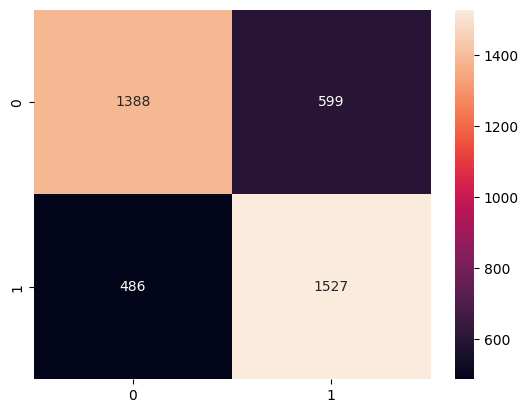

In [90]:
#LR + BOW

lr=LogisticRegression(random_state=42)
lr.fit(x_train_bow,y_train)
y_pred=lr.predict(x_test_bow)
print(classification_report(y_test,y_pred))
lr_bow_report=classification_report(y_test,y_pred,output_dict=True)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1987
           1       0.72      0.74      0.73      2013

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000

[[1401  586]
 [ 525 1488]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

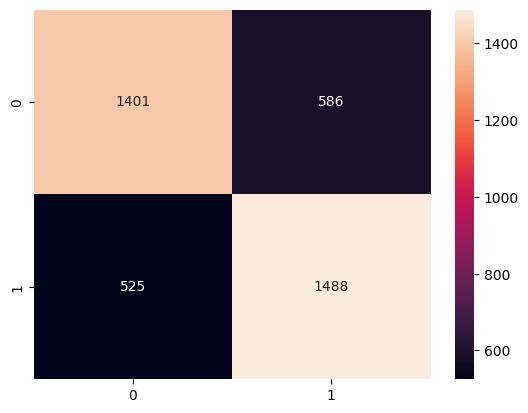

In [91]:
#LR + BOW + POS

lr=LogisticRegression(random_state=42)
lr.fit(x_train_bow_full,y_train)
y_pred=lr.predict(x_test_bow_full)
print(classification_report(y_test,y_pred))
lr_bow_full_report=classification_report(y_test,y_pred,output_dict=True)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#Poorer performance with pos

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1987
           1       0.72      0.77      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

[[1391  596]
 [ 471 1542]]


<Axes: >

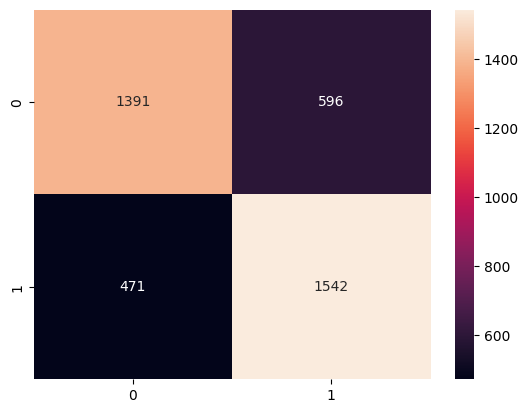

In [92]:
#LR + TF-IDF

lr=LogisticRegression(random_state=42)
lr.fit(x_train_tfidf,y_train)
y_pred=lr.predict(x_test_tfidf)
print(classification_report(y_test,y_pred))
lr_tfidf_report=classification_report(y_test,y_pred,output_dict=True)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#better performance than BOW

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1987
           1       0.71      0.70      0.70      2013

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000

[[1398  589]
 [ 605 1408]]


<Axes: >

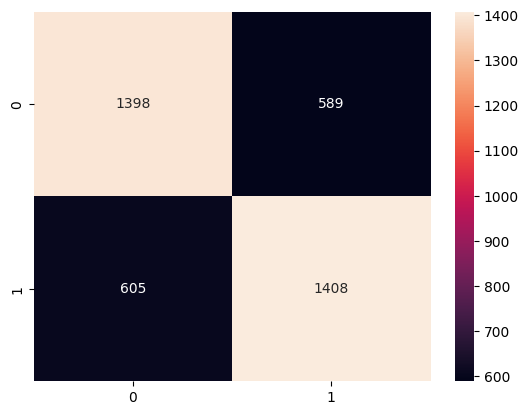

In [93]:
#LR + TF-IDF + POS

lr=LogisticRegression(random_state=42)
lr.fit(x_train_tfidf_full,y_train)
y_pred=lr.predict(x_test_tfidf_full)
print(classification_report(y_test,y_pred))
lr_tfidf_full_report=classification_report(y_test,y_pred,output_dict=True)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#Poorer performance than without pos

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1987
           1       0.70      0.73      0.71      2013

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000

[[1363  624]
 [ 551 1462]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

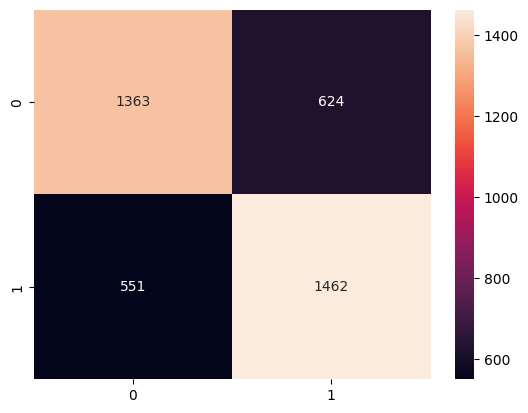

In [94]:
#w2v

lr=LogisticRegression(random_state=42)
lr.fit(x_train_w2vec,y_train_w2vec)
y_pred=lr.predict(x_test_w2vec)
print(classification_report(y_test_w2vec,y_pred))
lr_w2vec_report=classification_report(y_test_w2vec,y_pred,output_dict=True)
print(confusion_matrix(y_test_w2vec,y_pred))
sns.heatmap(data=confusion_matrix(y_test_w2vec,y_pred),annot=True,fmt='d')

# MNB

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1987
           1       0.73      0.73      0.73      2013

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000

[[1432  555]
 [ 548 1465]]


<Axes: >

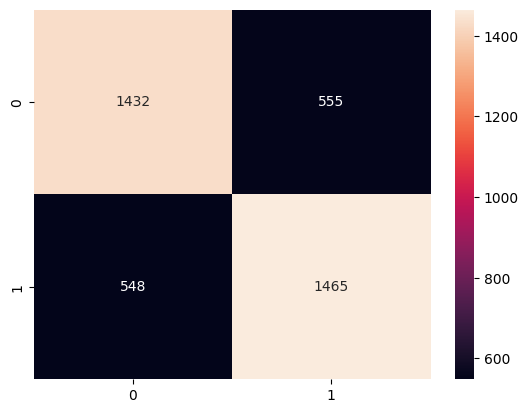

In [95]:
#MNB + BOW

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train_bow,y_train)
y_pred=nb.predict(x_test_bow)
nb_bow_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1987
           1       0.72      0.74      0.73      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

[[1419  568]
 [ 516 1497]]


<Axes: >

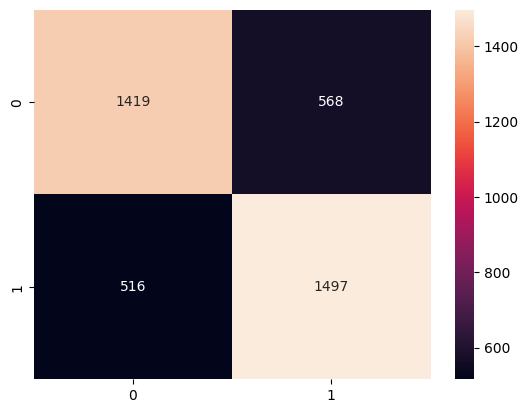

In [96]:
#MNB + BOW + POS

nb=MultinomialNB()
nb.fit(x_train_bow_full,y_train)
y_pred=nb.predict(x_test_bow_full)
nb_bow_full_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#performs better than the previous

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1987
           1       0.73      0.71      0.72      2013

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000

[[1454  533]
 [ 578 1435]]


<Axes: >

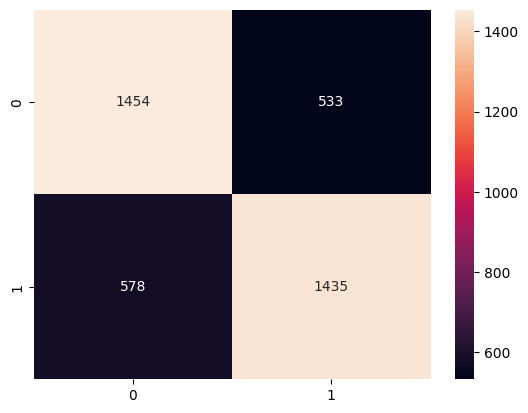

In [97]:
#MNB + TFIDF

nb=MultinomialNB()
nb.fit(x_train_tfidf,y_train)
y_pred=nb.predict(x_test_tfidf)
nb_tfidf_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#poorer performance than full bow

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1987
           1       0.71      0.72      0.72      2013

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000

[[1406  581]
 [ 568 1445]]


<Axes: >

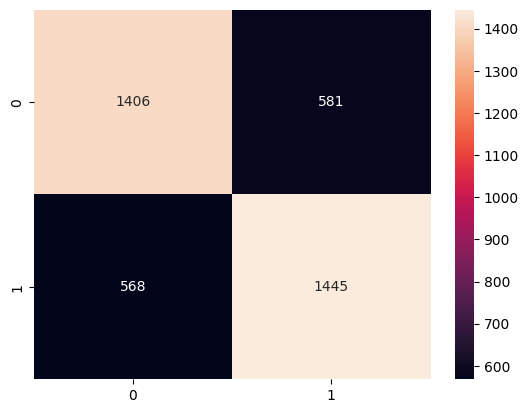

In [98]:
#MNB + TF-IDF + POS

nb=MultinomialNB()
nb.fit(x_train_tfidf_full,y_train)
y_pred=nb.predict(x_test_tfidf_full)
nb_tfidf_full_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#worse

In [99]:
#w2v

nb=MultinomialNB()
# Multinomial Naive Bayes cannot handle negative input values, which are present in Word2Vec embeddings.
# Consider using a different model like Logistic Regression or SVM for Word2Vec.
# nb.fit(x_train_w2vec,y_train_w2vec)
# y_pred=nb.predict(x_test_w2vec)
# print(classification_report(y_test_w2vec,y_pred))
# nb_w2vec_report=classification_report(y_test_w2vec,y_pred,output_dict=True)
# print(confusion_matrix(y_test_w2vec,y_pred))
# sns.heatmap(data=confusion_matrix(y_test_w2vec,y_pred),annot=True,fmt='d')

print("Multinomial Naive Bayes cannot be used with Word2Vec embeddings due to negative values.")

Multinomial Naive Bayes cannot be used with Word2Vec embeddings due to negative values.


# SVM

In [ ]:
#SVM + BOW

from sklearn.svm import SVC
svm=SVC(random_state=44)
svm.fit(x_train_bow,y_train)
y_pred=svm.predict(x_test_bow)
svm_bow_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#best performance so far

              precision    recall  f1-score   support

           0       0.60      0.45      0.51      1987
           1       0.56      0.71      0.63      2013

    accuracy                           0.58      4000
   macro avg       0.58      0.58      0.57      4000
weighted avg       0.58      0.58      0.57      4000

[[ 890 1097]
 [ 591 1422]]


<Axes: >

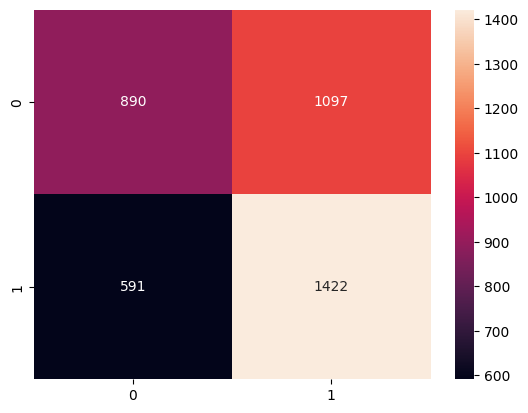

In [82]:
#SVM + BOW + POS

svm=SVC(random_state=44)
svm.fit(x_train_bow_full,y_train)
y_pred=svm.predict(x_test_bow_full)
svm_bow_full_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#worst performance so far

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1987
           1       0.72      0.76      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

[[1393  594]
 [ 476 1537]]


<Axes: >

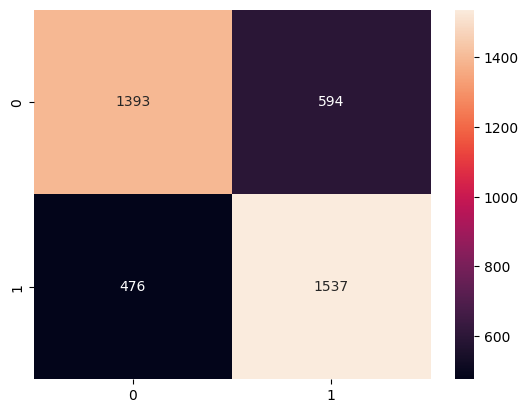

In [83]:
#SVM + TFIDF

svm=SVC(random_state=44)
svm.fit(x_train_tfidf,y_train)
y_pred=svm.predict(x_test_tfidf)
svm_tfidf_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#worse than BOW

              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1987
           1       0.54      0.70      0.61      2013

    accuracy                           0.55      4000
   macro avg       0.56      0.55      0.54      4000
weighted avg       0.56      0.55      0.54      4000

[[ 804 1183]
 [ 601 1412]]


<Axes: >

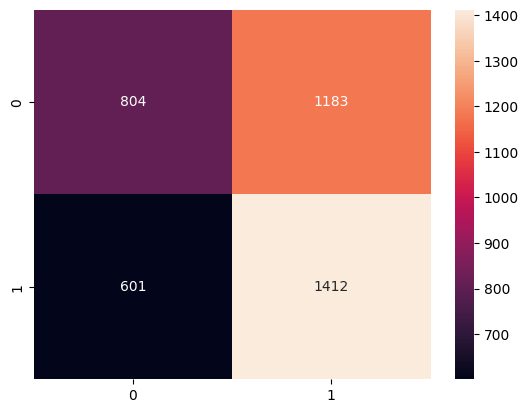

In [84]:
#SVM + TFIDF + POS

svm=SVC(random_state=44)
svm.fit(x_train_tfidf_full,y_train)
y_pred=svm.predict(x_test_tfidf_full)
svm_tfidf_full_report=classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d') #worse

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1987
           1       0.64      0.66      0.65      2013

    accuracy                           0.65      4000
   macro avg       0.65      0.64      0.64      4000
weighted avg       0.65      0.65      0.64      4000

[[1258  729]
 [ 691 1322]]


<Axes: >

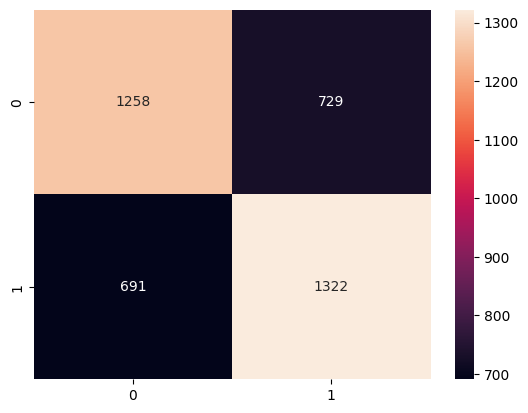

In [85]:
#SVM + W2VEC
svm=SVC(random_state=44)
svm.fit(x_train_w2vec,y_train_w2vec)
y_pred=svm.predict(x_test_w2vec)
svm_w2vec_report=classification_report(y_test_w2vec,y_pred,output_dict=True)
print(classification_report(y_test_w2vec,y_pred))
print(confusion_matrix(y_test_w2vec,y_pred))
sns.heatmap(data=confusion_matrix(y_test_w2vec,y_pred),annot=True,fmt='d')

Best Version of each model:

-LR: TFIDF

-MNB: TFIDF

-SVM: BOW

It's apparent that the numeric features from POS did not help at all improve the performance. Where each model performed better without them.

In [89]:
# Create DataFrame with selected model versions from the weighted avg
metrics_df = pd.DataFrame({
    'Logistic Regression': {
        'Precision': lr_tfidf_report['weighted avg']['precision'],
        'Recall': lr_tfidf_report['weighted avg']['recall'],
        'F1-Score': lr_tfidf_report['weighted avg']['f1-score']
    },
    'MNB': {
        'Precision': nb_tfidf_report['weighted avg']['precision'],
        'Recall': nb_tfidf_report['weighted avg']['recall'],
        'F1-Score': nb_tfidf_report['weighted avg']['f1-score']
    },
    'SVM': {
        'Precision': svm_bow_report['weighted avg']['precision'],
        'Recall': svm_bow_report['weighted avg']['recall'],
        'F1-Score': svm_bow_report['weighted avg']['f1-score']
    }
})

#Display
display(metrics_df.T.style.background_gradient(cmap='Blues'))

TypeError: string indices must be integers, not 'str'

In [88]:
# Create DataFrame with selected model versions from the weighted avg
metrics_df = pd.DataFrame ({

    'Logistic Regression': {
        'Precision': lr_tfidf_report ['weighted avg']['precision'],
        'Recall': lr_tfidf_report ['weighted avg']['recall'],
        'F1-Score': lr_tfidf_report ['weighted avg']['f1-score']
    },

    'MNB': {
        'Precision': nb_tfidf_report ['weighted avg']['precision'],
        'Recall': nb_tfidf_report ['weighted avg']['recall'],
        'F1-Score': nb_tfidf_report ['weighted avg']['f1-score']
    },

    'SVM': {
        'Precision': svm_bow_report ['weighted avg']['precision'],
        'Recall': svm_bow_report ['weighted avg']['recall'],
        'F1-Score': svm_bow_report ['weighted avg']['f1-score']
    }
    })

TypeError: string indices must be integers, not 'str'

In [ ]:
# Transpose
metrics_df = metrics_df.T
# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Models Comparison using Weighted Avg Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()